# Hands-On Machine Learning Tutorial (Part 2)

**Introduction:**
This Jupyter Notebook builds upon the data analysis skills from Part 1, introducing machine learning, deep learning, and time series analysis using Python. It covers fundamental concepts from various Kaggle courses, providing a practical, hands-on approach to these advanced topics.


**Prerequisites:**
* Completion of Part 1 tutorial or equivalent knowledge
* Basic understanding of Python and data analysis concepts
* Jupyter Notebook environment set up
* Install required libraries: pandas, scikit-learn, matplotlib, seaborn, tensorflow, prophet, statsmodels


In [97]:
!pip install pandas scikit-learn matplotlib seaborn tensorflow prophet statsmodels keras keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=1df39a373c7c69f9eaf77e4ac93f4174295a745c4110240006a07cc6e9b9ccf8
  Stored in directory: /root/.cache/pip/wheels/84/04/c8/f3d21e09aa3a1e25bc4a4fc07341ca073d7372f33dbd344a06
Successfully built keras.utils


## 1. Machine Learning Fundamentals
Based on "Intro to Machine Learning"

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error


Load preprocessed Titanic data from Part 1
(Assuming titanic_data is already cleaned and feature-engineered)

In [31]:
### Download Kaggle Titanic Dataset (train.csv)
!wget -O train.csv "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
!wget -O test.csv "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"


--2025-03-21 16:06:03--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-03-21 16:06:03 (6.02 MB/s) - ‘train.csv’ saved [60302/60302]

--2025-03-21 16:06:03--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘

In [32]:
### Read the Dataset
titanic_data = pd.read_csv("train.csv")

In [33]:
# Prepare features and target
X = titanic_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

In [34]:
# Create a new feature: Family Size
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

In [35]:
# Create age groups
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

In [36]:
# Extract title from Name
titanic_data['TitleCategory'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [37]:
# Group rare titles
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
titanic_data['TitleCategory'] = titanic_data['TitleCategory'].replace(rare_titles, 'Rare')

In [74]:
# Select features
X = titanic_data[['Sex', 'Embarked', 'TitleCategory', 'AgeGroup', 'Pclass', 'Fare', 'Age', 'FamilySize']]


In [75]:
# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'TitleCategory', 'AgeGroup', 'Age', 'FamilySize', 'Pclass', 'Fare',])

In [76]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [78]:
# Make predictions
preds = rf_model.predict(X_val)

In [79]:
# Evaluate
print(f"Accuracy: {accuracy_score(y_val, preds):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_val, preds))

Accuracy: 0.79
Confusion Matrix:
[[89 16]
 [21 53]]


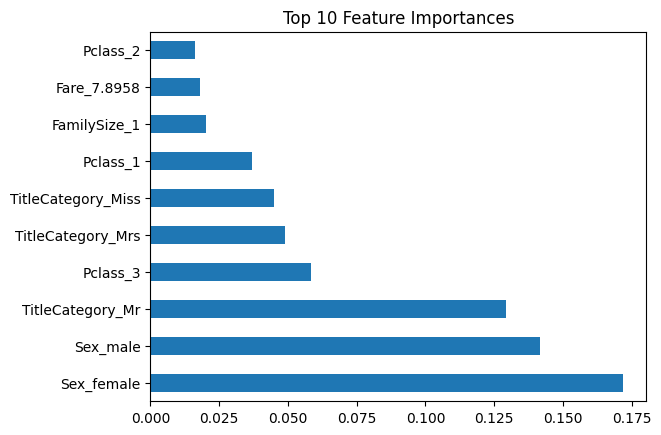

In [80]:
import matplotlib.pyplot as plt

# Feature Importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

## 2. Deep Learning Basics
Based on "Intro to Deep Learning"

In [102]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import keras
#from keras.utils import np_utils

In [16]:
# Load CIFAR10 data
(X_train_dl, y_train_dl), (X_test_dl, y_test_dl) = tf.keras.datasets.cifar10.load_data()

In [90]:
# Checking the number of rows (records) and columns (features)
print(X_train_dl.shape)
print(y_train_dl.shape)
print(X_test_dl.shape)
print(y_test_dl.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [91]:
# Checking the number of unique classes
print(np.unique(y_train_dl))
print(np.unique(y_test_dl))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


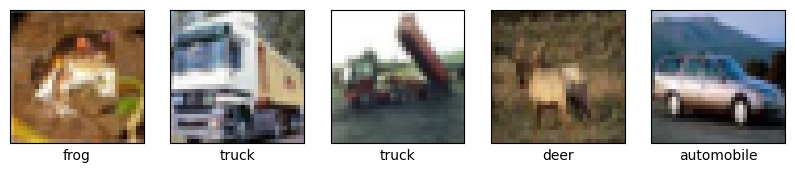

In [92]:
# Show some random training images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_dl[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_dl[i][0]])
plt.show()

In [7]:
# Data Preprocess

# Converting the pixels data to float type and Standardizing (255 is the total number of pixels an image can have)
X_train_dl = X_train_dl.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test_dl = X_test_dl.reshape(X_test_dl.shape[0], 28, 28, 1).astype('float32') / 255.0

In [ ]:
# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(y_train_dl, num_classes)
test_labels = np_utils.to_categorical(y_test_dl, num_classes)

In [103]:
# Build CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [106]:
# Train
history = model.fit(X_train_dl, y_train_dl,
                   epochs=5,
                   validation_data=(X_test_dl, y_test_dl))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.4113 - loss: 1.6593 - val_accuracy: 0.4504 - val_loss: 1.6078


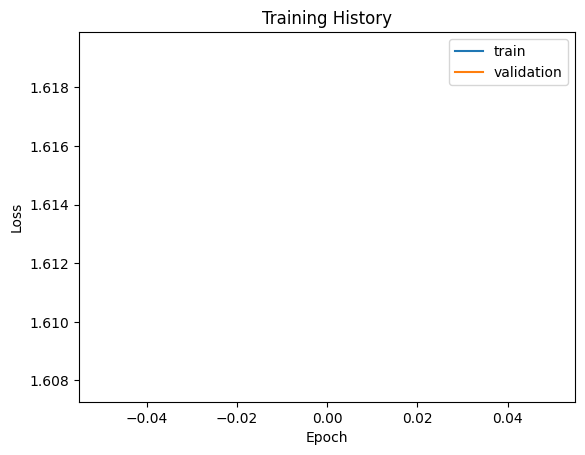

In [112]:
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


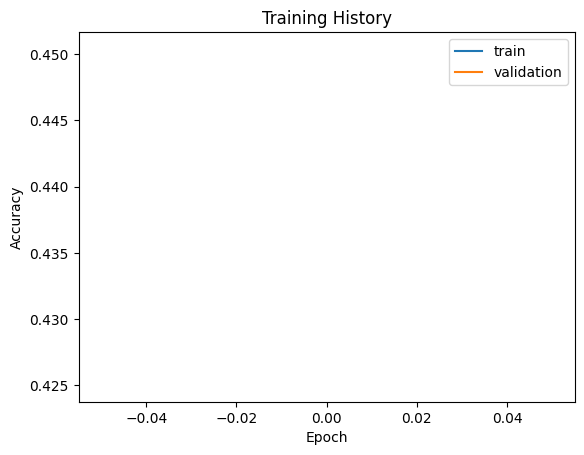

In [113]:
# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [127]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [129]:
# One hot encoding the target class (labels)
num_classes = 10
y_train_dl = to_categorical(y_train_dl, num_classes)
y_test_dl = to_categorical(y_test_dl, num_classes)

In [130]:
# Creating a sequential model and adding layers to it

model2 = Sequential()

model2.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.5))

model2.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.5))

model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [131]:
model2.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [132]:
# Train
history2 = model2.fit(X_train_dl, y_train_dl,
                   epochs=5,
                   validation_data=(X_test_dl, y_test_dl))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 508s 321ms/step - accuracy: 0.3141 - loss: 2.0933 - val_accuracy: 0.5246 - val_loss: 1.3545
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 480s 307ms/step - accuracy: 0.5648 - loss: 1.2095 - val_accuracy: 0.6855 - val_loss: 0.8882
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 516s 316ms/step - accuracy: 0.6502 - loss: 0.9995 - val_accuracy: 0.6909 - val_loss: 0.8804
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 538s 339ms/step - accuracy: 0.6901 - loss: 0.8933 - val_accuracy: 0.7420 - val_loss: 0.7251
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 500s 320ms/step - accuracy: 0.7137 - loss: 0.8259 - val_accuracy: 0.7475 - val_loss: 0.7327


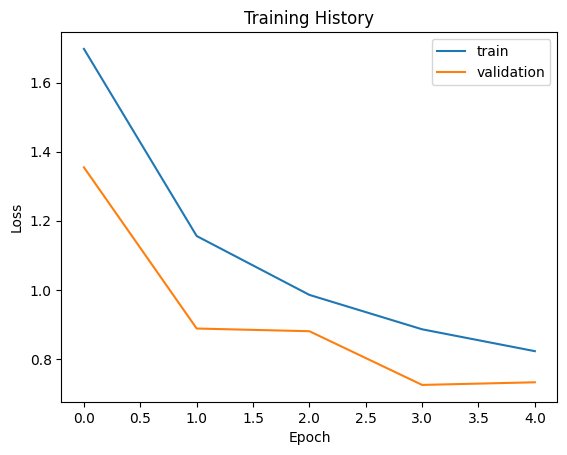

In [133]:
# Plot training history
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='validation')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

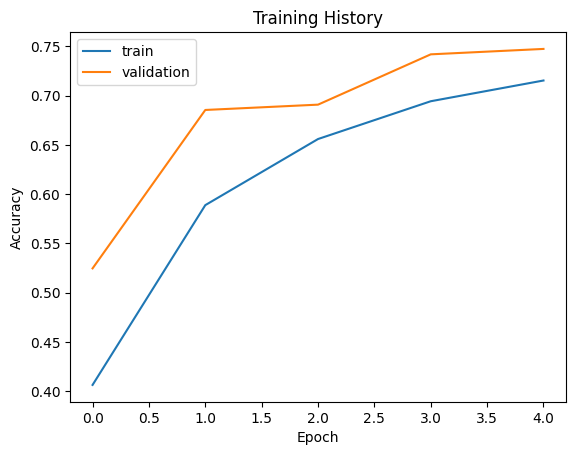

In [134]:
# Plot training history
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='validation')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [135]:
# Making the Predictions
pred = model.predict(X_test_dl)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
[[2.0416625e-02 1.5215665e-02 8.0611609e-02 ... 3.2126743e-02
  2.3063714e-02 1.9469412e-02]
 [4.0175119e-01 1.4616889e-01 2.6724319e-04 ... 2.8539259e-06
  3.7188452e-01 7.9666652e-02]
 [2.9531553e-01 1.8706758e-01 1.7645597e-02 ... 1.6489050e-03
  2.3515525e-01 2.2706570e-01]
 ...
 [2.7387764e-03 8.6258195e-02 2.1673039e-02 ... 4.8824038e-02
  8.5330000e-03 1.7186033e-02]
 [5.5896677e-02 8.9214228e-02 5.3666204e-02 ... 8.3816692e-02
  3.3667896e-02 5.5485062e-02]
 [1.7019409e-03 1.8116987e-04 6.9323822e-04 ... 9.7096801e-01
  7.4952564e-05 1.3416914e-04]]
[3 0 0 ... 5 6 7]


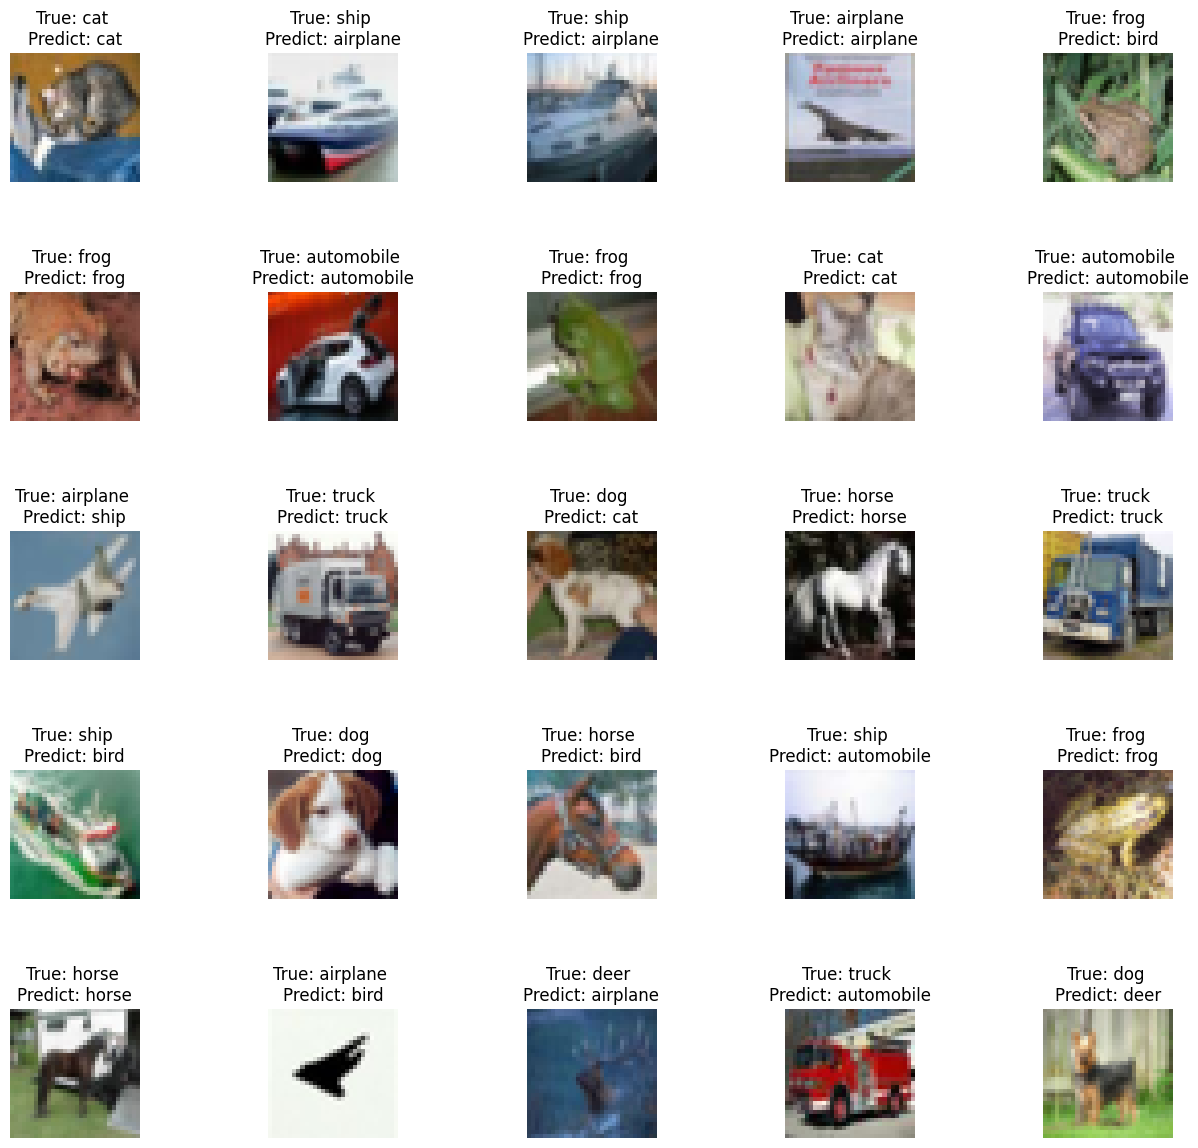

In [136]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test_dl[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test_dl[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## Computer Vision: Data Augmentation
Based on "Computer Vision" course

In [107]:
# Image augmentation example
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [108]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2)

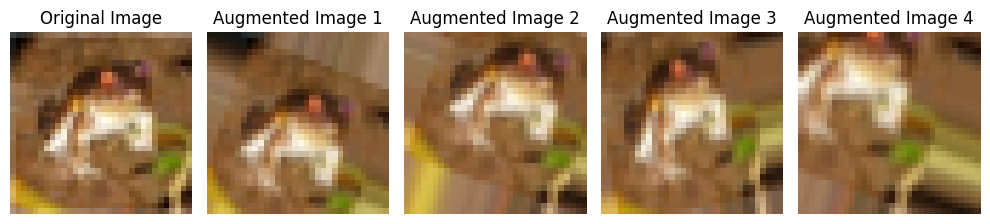

In [111]:
# Example image from the training set
img_to_augment = X_train_dl[0]

# Generate augmented images
augmented_images = datagen.flow(np.expand_dims(img_to_augment, axis=0), batch_size=1)

# Visualize the original image and some augmented versions
plt.figure(figsize=(10, 5))
plt.subplot(1, 5, 1)
plt.imshow(img_to_augment)
plt.title('Original Image')
plt.axis('off')

for i in range(4):
    augmented_img = next(augmented_images)[0].astype('uint8')
    plt.subplot(1, 5, i + 2)
    plt.imshow(augmented_img)
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Conclusion
In this advanced tutorial, we have covered:
1. Machine Learning fundamentals with Random Forest
2. Introduction to Deep Learning with CNNs
3. Basic Computer Vision concepts


 This notebook has provided a practical introduction to various advanced data science topics.
 To deepen your understanding, consider:
 - Experimenting with different models and hyperparameters
 - Exploring more advanced time series techniques
 - Diving deeper into deep learning architectures
 - Applying these concepts to different datasets and problem domains


 Remember, the field of data science and machine learning is vast and rapidly evolving.
 Continuous learning and practice are key to mastering these skills.

## References
[Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) \\
[Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning) \\
[Computer Vision](https://www.kaggle.com/learn/computer-vision) \\
[Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) \\
[Time Series](https://www.kaggle.com/learn/time-series) \\
[Titanic Dataset](https://www.kaggle.com/c/titanic/data) \\
[Pandas](https://www.kaggle.com/learn/pandas) \\
[Data Cleaning](https://www.kaggle.com/learn/data-cleaning) \\
[Data Visualization](https://www.kaggle.com/learn/data-visualization) \\
[Feature Engineering](https://www.kaggle.com/learn/feature-engineering) \\
